In [0]:
#https://keras.io/ko/getting-started/functional-api-guide/

In [1]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model

# 헤드라인 인풋: 1에서 10000사이의 100개 정수로 이루어진 시퀀스를 전달받습니다
# "name"인수를 전달하여 레이어를 명명할 수 있음을 참고하십시오.
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# 이 임베딩 레이어는 인풋 시퀀스를
# 밀집 512 차원 벡터의 시퀀스로 인코딩합니다
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# 장단기 메모리는 벡터 시퀀스를 전체 시퀀스에 대한
# 정보를 포함하는 단일 벡터로 변형합니다
lstm_out = LSTM(32)(x)

Using TensorFlow backend.


In [0]:
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

In [0]:
import keras 

auxiliary_input = Input(shape=(5,), name='aux_input')
x = keras.layers.concatenate([lstm_out, auxiliary_input])

# 심화 밀집 연결 네트워크를 상층에 쌓습니다
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# 끝으로 주요 로지스틱 회귀 레이어를 추가합니다
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

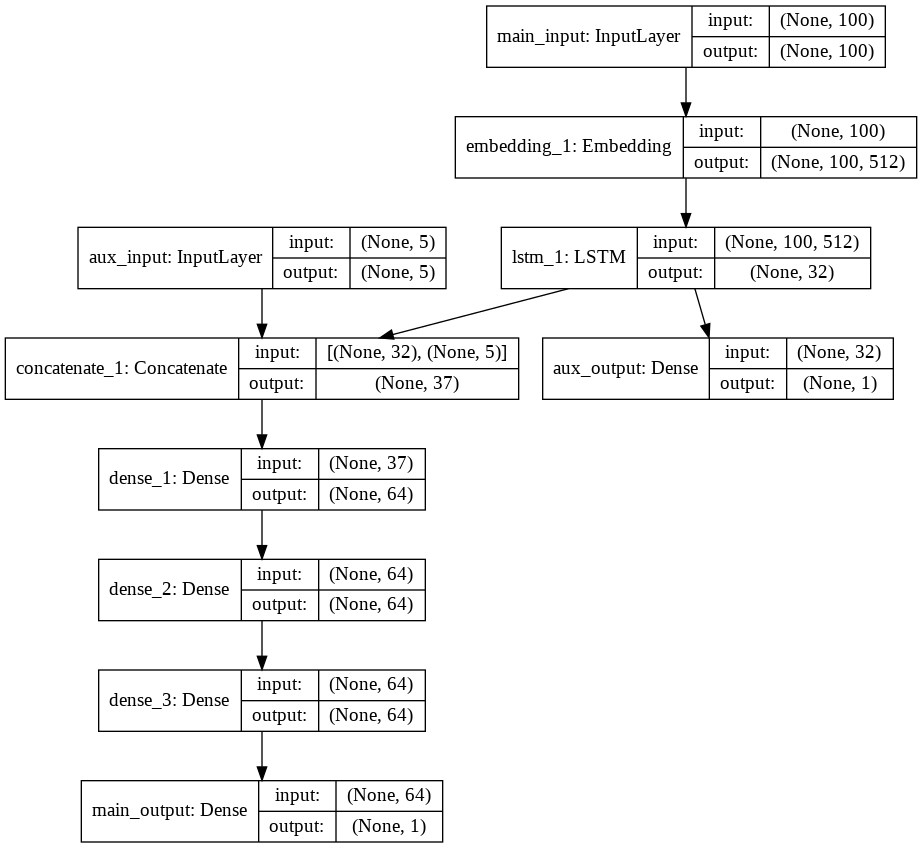

In [6]:
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

from keras.utils import plot_model
plot_model(model, to_file='model_plot4a.png', show_shapes=True, show_layer_names=True)

In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              loss_weights=[1., 0.2])

model.fit([headline_data, additional_data], [labels, labels],
          epochs=50, batch_size=32)

NameError: ignored

In [0]:
#이제 모델을 컴파일하고 0.2의 가중치를 보조 손실에 배당합니다. 리스트나 딕셔너리를 사용해서 각기 다른 아웃풋에 별도의 loss_weights 혹은 loss를 특정할 수 있습니다. 
#다음에서는 loss인수로 단일 손실을 전달하여 모든 아웃풋에 대해 동일한 손실이 사용되도록 합니다.
model.compile(optimizer='rmsprop',
              loss={'main_output': 'binary_crossentropy', 'aux_output': 'binary_crossentropy'},
              loss_weights={'main_output': 1., 'aux_output': 0.2})

#또한 모델을 다음과 같이도 학습시킬 수 있습니다:
model.fit({'main_input': headline_data, 'aux_input': additional_data},
          {'main_output': labels, 'aux_output': labels},
          epochs=50, batch_size=32)